In [1]:
from numpy.random import seed 
seed(1) 
import tensorflow as tf 
tf.random.set_seed(1234)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')
%matplotlib inline
import datetime

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from time import time
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Masking, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from tensorflow.math import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
train = pd.read_csv('../ECG_dataset/train.csv')
train.head()

,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046113999999999995,...,0.051275,0.06124400000000001,0.053409000000000005,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836000000000002,0.030808999999999996
0,0,0.42438,0.34442,0.348130,0.340170,0.243370,0.241730,0.268780,0.27342,0.35644,...,0.526440,0.559020,0.55567,0.597270,0.570760,0.46749,0.46340,0.48188,0.43219,0.39453
1,0,1.52950,1.77660,1.936700,1.840200,1.800000,1.724900,1.405800,1.00880,0.72472,...,0.169600,0.126170,0.25830,0.238590,0.465590,0.64028,0.72765,0.86787,1.05860,1.29530
2,0,1.28650,1.04990,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.12075,-0.10301,...,0.966370,1.106500,1.09190,1.302600,1.572700,1.73370,1.74060,1.71170,1.57930,1.51410
3,1,-0.17540,-0.12192,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.24071,0.31434,...,-0.234150,-0.248470,-0.17759,-0.223010,-0.277270,-0.23328,-0.25261,-0.26422,-0.17639,-0.15493
4,0,0.17394,0.14885,0.178910,0.237310,0.276120,0.398650,0.463010,0.47182,0.55540,...,0.046535,0.001148,-0.00753,0.008211,-0.028456,0.04728,0.10666,0.16788,0.10543,0.20467


In [4]:
train = pd.read_csv('../ECG_dataset/train.csv', names = [i for i in range(141)])
validation = pd.read_csv('../ECG_dataset/validation.csv', names = [i for i in range(141)])
trainval = pd.read_csv('../ECG_dataset/trainval.csv', names = [i for i in range(141)])
test = pd.read_csv('../ECG_dataset/test.csv', names = [i for i in range(141)])


In [5]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1,0.024133,0.016065,0.044639,0.031001,-0.009473,-0.042663,-0.077283,-0.091508,-0.046114,...,0.051275,0.061244,0.053409,0.12092,0.081996,0.039526,0.073486,0.020875,-0.018836,0.030809
1,0,0.424380,0.344420,0.348130,0.340170,0.243370,0.241730,0.268780,0.273420,0.356440,...,0.526440,0.559020,0.555670,0.59727,0.570760,0.467490,0.463400,0.481880,0.432190,0.394530
2,0,1.529500,1.776600,1.936700,1.840200,1.800000,1.724900,1.405800,1.008800,0.724720,...,0.169600,0.126170,0.258300,0.23859,0.465590,0.640280,0.727650,0.867870,1.058600,1.295300
3,0,1.286500,1.049900,0.793600,0.473590,0.111730,-0.054857,-0.062095,-0.120750,-0.103010,...,0.966370,1.106500,1.091900,1.30260,1.572700,1.733700,1.740600,1.711700,1.579300,1.514100
4,1,-0.175400,-0.121920,-0.053532,-0.024293,0.022917,0.116440,0.187040,0.240710,0.314340,...,-0.234150,-0.248470,-0.177590,-0.22301,-0.277270,-0.233280,-0.252610,-0.264220,-0.176390,-0.154930


In [6]:
train.shape

(1081, 141)

In [7]:
validation.shape

(541, 141)

In [8]:
trainval.shape

(1622, 141)

In [9]:
test.shape

(180, 141)

In [10]:
x_train = train.iloc[:,1:141]
y_train = train.iloc[:,0]

x_validation = validation.iloc[:,1:141]
y_validation = validation.iloc[:,0]

x_trainval = trainval.iloc[:,1:141]
y_trainval = trainval.iloc[:,0]

x_test_real = test.iloc[:,1:141]
y_test_real = test.iloc[:,0]

check the range of every feature value

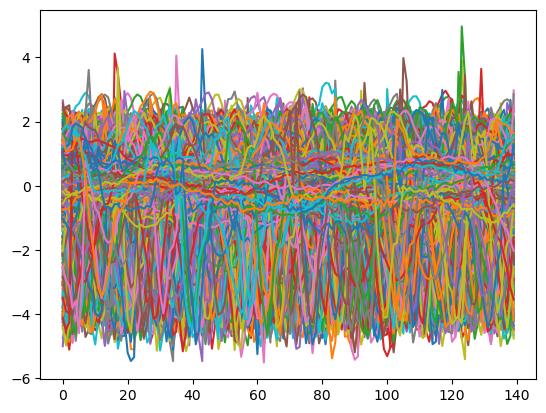

In [11]:
for i in range(len(x_trainval)):
               
    plt.plot(range(len(x_trainval.iloc[i,:])), x_trainval.iloc[i,:])

standardization

In [12]:
scaler = StandardScaler()
scaler0 = scaler.fit(x_train)
x_train = scaler0.fit_transform(x_train)

scaler1 = scaler.fit(x_train)
x_validation = scaler1.fit_transform(x_validation)

scaler2 = scaler.fit(x_train)
x_trainval = scaler2.fit_transform(x_trainval)

scaler3 = scaler.fit(x_train)
x_test_real = scaler3.fit_transform(x_test_real)

transfer label to one-hot

In [13]:
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)
y_trainval = to_categorical(y_trainval)
y_test_real = to_categorical(y_test_real)

y_test_real.shape

(180, 2)

In [14]:
# xx_train = np.expand_dims(x_train, axis=-1)
# xx_validation = np.expand_dims(x_validation, axis=-1)
# xx_trainval = np.expand_dims(x_trainval, axis=-1)
# xx_test_real = np.expand_dims(x_test_real, axis=-1)

# xx_train.shape

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# X_trainval, X_trainval, y_trainval, y_trainval = train_test_split(x_trainval, y_trainval, test_size=0.2, random_state=42)

### LSTM

In [16]:
model = Sequential()
# model.add(Masking(mask_value=-1., input_shape=(140,1)))
model.add(LSTM(units=20, activation="relu", input_shape=(140,1)))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 50)                1050      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________


In [18]:
callback = EarlyStopping(patience=5, restore_best_weights=True)
#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit model
model.fit(x_train, y_train,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )


Epoch 1/75


2022-10-30 10:20:21.626754: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 1s 40ms/step - loss: 0.6967 - accuracy: 0.5359 - val_loss: 0.6950 - val_accuracy: 0.5346
Epoch 2/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6887 - accuracy: 0.5637 - val_loss: 0.6889 - val_accuracy: 0.5161
Epoch 3/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6856 - accuracy: 0.5764 - val_loss: 0.6848 - val_accuracy: 0.5806
Epoch 4/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6795 - accuracy: 0.5903 - val_loss: 0.6814 - val_accuracy: 0.5853
Epoch 5/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6795 - accuracy: 0.5810 - val_loss: 0.6785 - val_accuracy: 0.5853
Epoch 6/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6735 - accuracy: 0.5822 - val_loss: 0.6761 - val_accuracy: 0.5853
Epoch 7/75
7/7 [==============================] - 0s 23ms/step - loss: 0.6724 - accuracy: 0.5822 - val_loss: 0.6736 - val_accuracy: 0.5853
Epoch 8/75
7/7 [======================

In [19]:
#evaluate model
result = model.predict(x_validation)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_validation.argmax(axis=1)
accuracy = model.evaluate(x_validation, y_validation)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy at validation dataset:', accuracy)
print('precision at validation dataset:', precision)
print('recall at validation dataset:', recall)
print('f1 at validation dataset:', f1)
print('auc at validation dataset:', auc)

17/17 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6155
accuracy at validation dataset: 0.6155267953872681
precision at validation dataset: 0.600997506234414
recall at validation dataset: 0.36507936507936506
f1 at validation dataset: 0.46938775510204084
auc at validation dataset: 0.5994946998407207


In [20]:
model.fit(x_trainval, y_trainval,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )

Epoch 1/75
11/11 [==============================] - 0s 24ms/step - loss: 628853.5625 - accuracy: 0.6307 - val_loss: 0.6372 - val_accuracy: 0.6031
Epoch 2/75
11/11 [==============================] - 0s 22ms/step - loss: 546644.7500 - accuracy: 0.6291 - val_loss: 0.6340 - val_accuracy: 0.6123
Epoch 3/75
11/11 [==============================] - 0s 23ms/step - loss: 336382.6250 - accuracy: 0.6369 - val_loss: 0.6295 - val_accuracy: 0.6031
Epoch 4/75
11/11 [==============================] - 0s 23ms/step - loss: 293982.0312 - accuracy: 0.6554 - val_loss: 0.6250 - val_accuracy: 0.6400
Epoch 5/75
11/11 [==============================] - 0s 23ms/step - loss: 325411.5625 - accuracy: 0.6515 - val_loss: 0.6193 - val_accuracy: 0.6677
Epoch 6/75
11/11 [==============================] - 0s 24ms/step - loss: 329268.0625 - accuracy: 0.6523 - val_loss: 0.6171 - val_accuracy: 0.6492
Epoch 7/75
11/11 [==============================] - 0s 22ms/step - loss: 342861.3125 - accuracy: 0.6476 - val_loss: 0.6137 -

In [21]:
#evaluate model
result = model.predict(x_test_real)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_test_real.argmax(axis=1)
accuracy = model.evaluate(x_test_real, y_test_real)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy dataset:', accuracy)
print('precision dataset:', precision)
print('recall dataset:', recall)
print('f1 dataset:', f1)
print('auc dataset:', auc)

6/6 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7111
accuracy dataset: 0.7111111283302307
precision dataset: 0.7314814814814815
recall dataset: 0.6282051282051282
f1 dataset: 0.6533333333333333
auc dataset: 0.7013574660633484


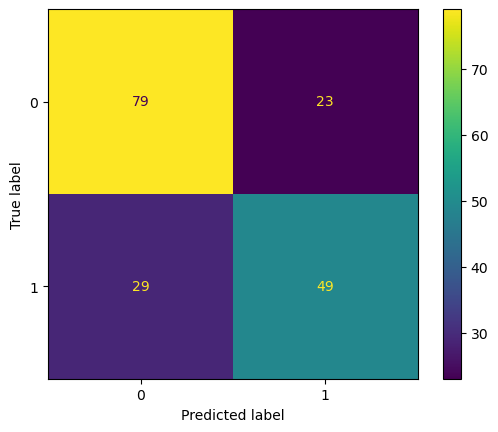

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
# matrix = confusion_matrix(y_test, y_pred, 2)
# labels_name = [1,0]
cm = np.array(cm) 
ConfusionMatrixDisplay(cm).plot()

* train and validation dataset  
    accuracy at test dataset: 0.9519408345222473  
    precision at test dataset: 0.9255663430420712  
    recall at test dataset: 0.9087301587301587  
    f1 at test dataset: 0.946280991735537  
    auc at test dataset: 0.9491747679463942  
* trainval and test dataset  
    accuracy at test dataset: 0.9777777791023254  
    precision at test dataset: 0.9711538461538461  
    recall at test dataset: 0.9615384615384616  
    f1 at test dataset: 0.974025974025974  
    auc at test dataset: 0.9758672699849171  

### LSTM optimization
1.modify adam->rsmprop

In [23]:
model = Sequential()
# model.add(Masking(mask_value=-1., input_shape=(140,1)))
model.add(LSTM(units=20, activation="tanh", input_shape=(140,1)))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

callback = EarlyStopping(patience=5, restore_best_weights=True)
#compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) #categorical_crossentropy
#fit model
model.fit(x_train, y_train,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )
#evaluate model
result = model.predict(x_validation)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_validation.argmax(axis=1)
accuracy = model.evaluate(x_validation, y_validation)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy at validation dataset:', accuracy)
print('precision at validation dataset:', precision)
print('recall at validation dataset:', recall)
print('f1 at validation dataset:', f1)
print('auc at validation dataset:', auc)

Epoch 1/75
7/7 [==============================] - 1s 50ms/step - loss: 0.6896 - accuracy: 0.5498 - val_loss: 0.6790 - val_accuracy: 0.5760
Epoch 2/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6734 - accuracy: 0.5671 - val_loss: 0.6767 - val_accuracy: 0.5760
Epoch 3/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6691 - accuracy: 0.5799 - val_loss: 0.6717 - val_accuracy: 0.5853
Epoch 4/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6677 - accuracy: 0.5741 - val_loss: 0.6687 - val_accuracy: 0.5806
Epoch 5/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6655 - accuracy: 0.5729 - val_loss: 0.6666 - val_accuracy: 0.5714
Epoch 6/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6607 - accuracy: 0.5822 - val_loss: 0.6648 - val_accuracy: 0.5853
Epoch 7/75
7/7 [==============================] - 0s 25ms/step - loss: 0.6577 - accuracy: 0.5764 - val_loss: 0.6606 - val_accuracy: 0.5760
Epoch 8/75
7/7 [===========

Epoch 1/75
11/11 [==============================] - 0s 24ms/step - loss: 0.2006 - accuracy: 0.9399 - val_loss: 0.1681 - val_accuracy: 0.9600
Epoch 2/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1639 - accuracy: 0.9545 - val_loss: 0.1721 - val_accuracy: 0.9631
Epoch 3/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1689 - accuracy: 0.9568 - val_loss: 0.2101 - val_accuracy: 0.9354
Epoch 4/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1696 - accuracy: 0.9476 - val_loss: 0.1797 - val_accuracy: 0.9508
Epoch 5/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1628 - accuracy: 0.9537 - val_loss: 0.1878 - val_accuracy: 0.9508
Epoch 6/75
6/6 [==============================] - 0s 3ms/step - loss: 0.0720 - accuracy: 0.9889
accuracy dataset: 0.9888888597488403
precision dataset: 0.9807692307692307
recall dataset: 0.9743589743589743
f1 dataset: 0.9870129870129869
auc dataset: 0.9871794871794872


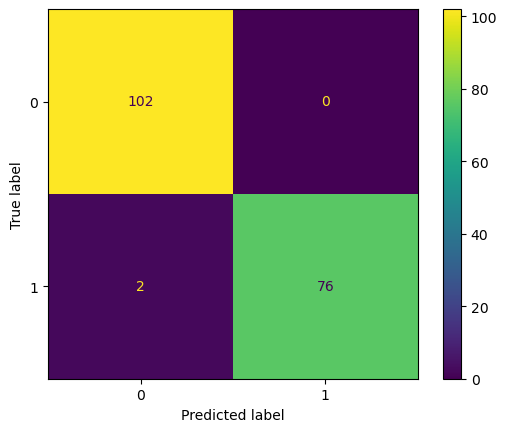

In [24]:
model.fit(x_trainval, y_trainval,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )
#evaluate model
result = model.predict(x_test_real)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_test_real.argmax(axis=1)
accuracy = model.evaluate(x_test_real, y_test_real)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy dataset:', accuracy)
print('precision dataset:', precision)
print('recall dataset:', recall)
print('f1 dataset:', f1)
print('auc dataset:', auc)
from sklearn.metrics import ConfusionMatrixDisplay
cm = np.array(cm) 
ConfusionMatrixDisplay(cm).plot()

* train and validation dataset  
accuracy at test dataset: 0.9463955760002136  
precision at test dataset: 0.9304635761589404  
recall at test dataset: 0.9166666666666666  
f1 at test dataset: 0.9409368635437881  
auc at test dataset: 0.9444925028835064  
* trainval and test dataset  
accuracy at test dataset: 0.9611111283302307  
precision at test dataset: 0.9611650485436893  
recall at test dataset: 0.9487179487179487  
f1 at test dataset: 0.9548387096774195  
auc at test dataset: 0.9596530920060331  

### GRU

In [25]:
model1 = Sequential()
# model1.add(Masking(mask_value=-1., input_shape=(140,1)))
model1.add(GRU(units=20, activation="tanh", input_shape=(140,1)))
model1.add(Dense(50, activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(2, activation='softmax'))#, activation='softmax'

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20)                1760      
                                                                 
 dense_2 (Dense)             (None, 50)                1050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________


In [26]:
callback = EarlyStopping(patience=5, restore_best_weights=True)
#compile model
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) #rmsprop
#fit model
model1.fit(x_train, y_train,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )
#evaluate model
result = model1.predict(x_validation)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_validation.argmax(axis=1)
accuracy = model1.evaluate(x_validation, y_validation)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy at validation dataset:', accuracy)
print('precision at validation dataset:', precision)
print('recall at validation dataset:', recall)
print('f1 at validation dataset:', f1)
print('auc at validation dataset:', auc)

Epoch 1/75
7/7 [==============================] - 1s 49ms/step - loss: 0.6882 - accuracy: 0.5394 - val_loss: 0.6814 - val_accuracy: 0.5714
Epoch 2/75
7/7 [==============================] - 0s 25ms/step - loss: 0.6826 - accuracy: 0.5613 - val_loss: 0.6803 - val_accuracy: 0.5853
Epoch 3/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6849 - accuracy: 0.5498 - val_loss: 0.6793 - val_accuracy: 0.5806
Epoch 4/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6843 - accuracy: 0.5613 - val_loss: 0.6792 - val_accuracy: 0.5806
Epoch 5/75
7/7 [==============================] - 0s 25ms/step - loss: 0.6803 - accuracy: 0.5648 - val_loss: 0.6794 - val_accuracy: 0.5853
Epoch 6/75
7/7 [==============================] - 0s 25ms/step - loss: 0.6776 - accuracy: 0.5729 - val_loss: 0.6801 - val_accuracy: 0.5853
Epoch 7/75
7/7 [==============================] - 0s 24ms/step - loss: 0.6790 - accuracy: 0.5648 - val_loss: 0.6789 - val_accuracy: 0.5806
Epoch 8/75
7/7 [===========

In [27]:
model.fit(x_trainval, y_trainval,
          epochs=75,
          batch_size=128,
          verbose=1,
          callbacks = [callback],
          validation_split=0.2
         )
#evaluate model
result = model1.predict(x_test_real)#got model predict result
y_pred = result.argmax(axis=1)
y_test = y_test_real.argmax(axis=1)
accuracy = model1.evaluate(x_test_real, y_test_real)[1]
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)#clf.decision_function(x_validation) is probability，Confidence  
cm = confusion_matrix(y_test,y_pred)
precision = float(cm[0,0]/(cm[0,0]+cm[1,0]))
fpr = cm[1,0]/(cm[1,:0]+cm[1,:1])
print('accuracy dataset:', accuracy)
print('precision dataset:', precision)
print('recall dataset:', recall)
print('f1 dataset:', f1)
print('auc dataset:', auc)

Epoch 1/75
11/11 [==============================] - 0s 25ms/step - loss: 0.1746 - accuracy: 0.9476 - val_loss: 0.1706 - val_accuracy: 0.9600
Epoch 2/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1832 - accuracy: 0.9499 - val_loss: 0.1702 - val_accuracy: 0.9631
Epoch 3/75
11/11 [==============================] - 0s 24ms/step - loss: 0.1628 - accuracy: 0.9561 - val_loss: 0.1731 - val_accuracy: 0.9538
Epoch 4/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1659 - accuracy: 0.9499 - val_loss: 0.1735 - val_accuracy: 0.9538
Epoch 5/75
11/11 [==============================] - 0s 24ms/step - loss: 0.1842 - accuracy: 0.9437 - val_loss: 0.1748 - val_accuracy: 0.9538
Epoch 6/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1535 - accuracy: 0.9568 - val_loss: 0.1691 - val_accuracy: 0.9569
Epoch 7/75
11/11 [==============================] - 0s 23ms/step - loss: 0.1596 - accuracy: 0.9561 - val_loss: 0.1795 - val_accuracy: 0.9477
Epoch 8/75
11

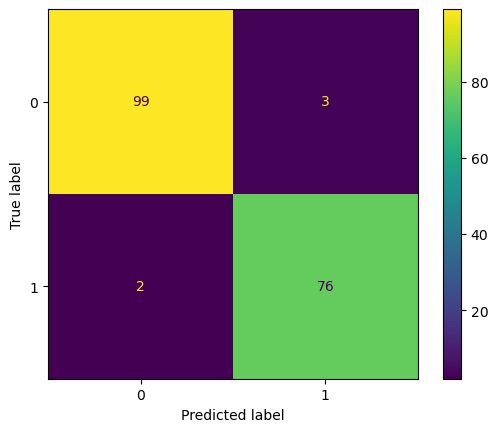

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = np.array(cm) 
ConfusionMatrixDisplay(cm).plot()